# 模型的使用及修改、保存与加载

以图像处理中torchvision为例，PyTorch通过torchvision.models模块提供了更多的预训练模型.

在图像分类当中，包括许多模型
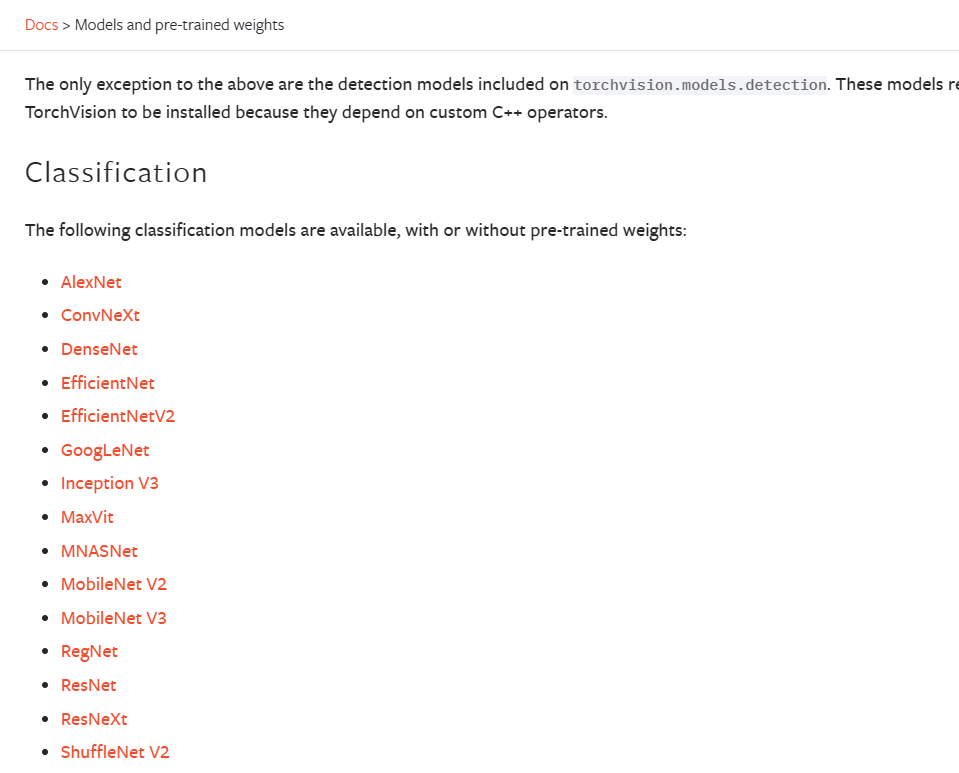

In [27]:
import torch

In [29]:
torch.__version__

'1.13.0+cu117'

In [31]:
import torchvision

C:\Users\ZhuanZ\anaconda3\envs\torch_gpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


本文将以VGG16为例，展示Pytorch对现有模型的使用及修改的具体操作
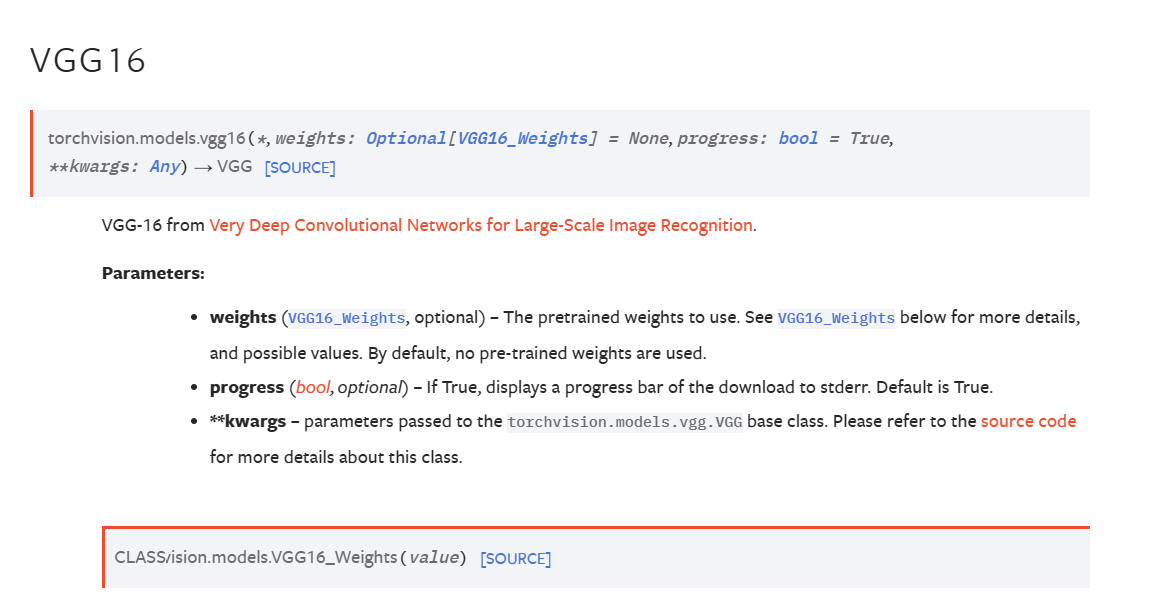

  VGG16是一个经典的卷积神经网络模型，由牛津大学计算机视觉组（Visual Geometry Group）提出，用于参加2014年的`ImageNet图像分类`。

VGG 最大的特点就是通过比较彻底地采用 3x3 尺寸的卷积核来堆叠神经网络，这样也加深整个神经网络的深度。这两个重要的改变对于人们重新定义卷积神经网络模型架构也有不小的帮助，至少证明使用更小的卷积核并且增加卷积神经网络的深度，可以更有效地提升模型的性能。

 - weights(可选)：指定要加载的预训练权重。可以是None（默认值）表示不加载预训练权重，或是指定为预定义的某个预训练权重标识符。
 - progress:指示下载进度条的显示设置，默认为True显示下载进度条。
 - kwargs:其它可选参数，传递给VGG-16模型的基类torchvision.models.VGG

In [3]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

从上述运行结果可知：VGG16网络是由13层卷积层和3层全连接层组成，最后网络输出一共有1000个分类结果。

修改VGG16模型：

      以CIFAR10为例
      
      使用add_module()方法在VGG16模型后增加一个线性层，实现将VGG16的1000个类别输出为类似CIFAR10的10个类别，代码如下：

In [4]:
import torchvision.models as models
from torch import nn

vgg16 = torchvision.models.vgg16(weights=True,progress=True)

vgg16.add_module("add_linear", nn.Linear(1000, 10))
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

由上述可以知道，add_linear是在classifier外面的，如果要在classifier里面，可以将

In [ ]:
vgg16.add_module("add_linear", nn.Linear(1000, 10))

替换为

In [ ]:
vgg16.classifier.add_module("add_linear", nn.Linear(1000, 10))

In [5]:
import torchvision.models as models
from torch import nn

vgg16 = torchvision.models.vgg16(weights=True,progress=True)

vgg16.classifier.add_module("add_linear", nn.Linear(1000, 10))
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

也可以直接进行修改,例如对classifier中的 `6): Linear(in_features=4096, out_features=1000, bias=True)`直接修改为out_features=10

In [8]:
vgg16.classifier[6] = nn.Linear(in_features=4096,out_features=10,bias=True)

# 网络模型的保存与读取
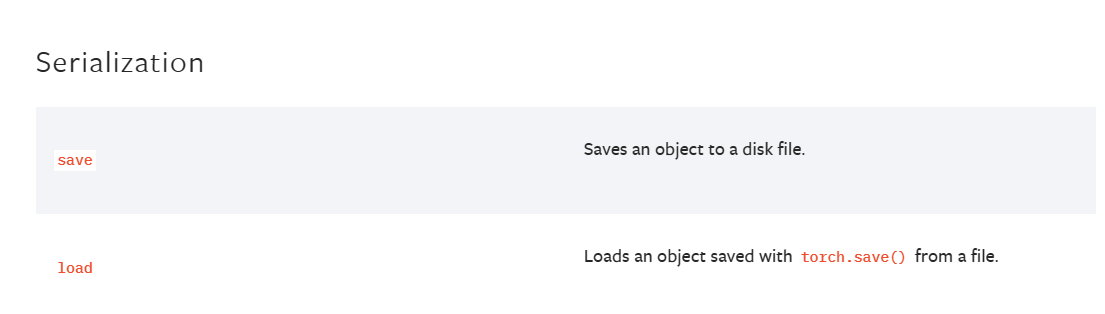

## 模型的保存

In [ ]:
torch.save(obj, f, pickle_protocol=DEFAULT_PROTOCOL)

|参数  | 描述 |
|--|--|
|obj:|要保存的对象，可以是模型、张量、字典等|
|f:|要保存到的文件路径或文件对象|
|pickle_protocol:|序列化协议的版本，默认为DEFAULT_PROTOCOL|

>方法一：保存整个模型，包括其相关的所有参数，利用`torch.save()`

In [6]:
import torchvision

vgg16 = torchvision.models.vgg16(weights=True, progress=True)
torch.save(vgg16, "vgg16_model_true.pth")

>方法二：只保存模型参数，在原有vgg16对象中使用.state_dict()方法即可。

In [7]:
import torchvision

vgg16 = torchvision.models.vgg16(weights=True,progress=True)
torch.save(vgg16.state_dict(), "vgg16_model_true_2.pth")

运行成功后，对应的文件：vgg16_model_true.pth和  vgg16_model_true_2.pth会保存在默认路径当中

## 网络模型的加载

In [ ]:
torch.load(f, map_location=None, pickle_module=pickle, *, weights_only=False, mmap=None, **pickle_load_args)

|参数  | 描述 |
|--|--|
|f|要加载的文件路径或文件对象|
|map_location|可选参数，用于指定在哪个设备上加载模型。如果不提供该参数，默认会加载到当前设备|
|pickle_module|可选参数，用于指定用于反序列化的模块。默认为pickle|
|pickle_load_args|其他可选的用于反序列化的参数|

In [9]:
import torch
import torchvision.models as models
from torch import nn
# 因为vgg16_model_true.pth是使用方法一保存的，故输出后是整个模型网络结构
model1 = torch.load("vgg16_model_true.pth")
print(model1)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
# 因为vgg16_model_true_2.pth是使用方法二保存的，只保留模型参数，故输出后是整个字典类型
model2 = torch.load("vgg16_model_true_2.pth")
print(model2)

OrderedDict([('features.0.weight', tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[ 1.7715e-01,  5.2149

>针对只保存了模型参数的，使其显示完整的模型结构，利用.load_state_dict()

In [15]:
import torch
import torchvision.models as models
from torch import nn

vgg16 = models.vgg16(weights=False)

vgg16.load_state_dict(torch.load("vgg16_model_true_2.pth"))  # 针对第二种加载参数的情况，使其显示完整的网络结构
print(vgg16_true)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

注意： 加载模型时，要确保当前代码中使用的模型类与之前保存的模型类相同。

> 总结

`torch.load()`是PyTorch中用于加载保存的对象的函数，可以加载之前使用

`torch.save()`保存的模型、张量、字典等。可以指定要加载的文件路径或文件对象，并可选地指定加载到的设备、反序列化模块等参数。

# 完整的模型训练套路

## 数据集加载步骤
使用适当的库加载数据集，例如torchvision、TensorFlow的tf.data等。
将数据集分为训练集和测试集，并进行必要的预处理，如归一化、数据增强等。
## 模型创建步骤
创建机器学习模型，可以是深度神经网络、传统机器学习模型或其它模型类型。
定义模型架构，包括输入层、隐藏层和输出层的结构、激活函数、损失函数等。
## 损失函数和优化器定义步骤
定义适当的损失函数来计算模型预测结果于真实标签之间的差异。
选择适当的优化器算法来更新模型参数，如随机梯度下降（SGD）、Adam等。
## 训练循环步骤
从训练集中获取一批样本数据，并将其输入模型进行前向传播。
计算损失函数，并根据损失函数进行反向传播和参数更新。
重复以上步骤，直到达到预定的训练次数或达到收敛条件。
## 测试循环步骤
从测试集中获取一批样本数据，并将其输入模型进行前向传播。
计算损失函数或评估指标，用于评估模型在测试集上的性能。
## 训练和测试过程的记录和输出步骤
使用适当的工具或库记录训练过程中的损失值、准确率、评估指标等。
可以使用TensorBoard、matplotlib、CSV文件等方式记录和可视化训练和测试结果。
## 结束训练步骤
根据训练结束条件、例如达到预定的训练次数或收敛条件，结束训练。
可以保存模型参数或整个模型，以便日后部署和使用。

# 以CIFAR10为例实践

并利用tensorboard可视化

In [2]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [4]:
'''数据集加载'''
train_data = torchvision.datasets.CIFAR10(root='dataset',train=True,transform=torchvision.transforms.ToTensor(),download=True)
test_data = torchvision.datasets.CIFAR10(root='dataset',train=False,transform=torchvision.transforms.ToTensor(),download=True)

# 训练数据集的长度
train_data_size = len(train_data)
print(f"训练数据集的长度为：{train_data_size}")
# 测试数据集的长度
test_data_size = len(test_data)
print(f"测试数据集的长度：{test_data_size}")
#利用DataLoader加载数据集
train_dataloader = DataLoader(test_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度为：50000
测试数据集的长度：10000


'''创建模型'''

以上篇文章《Pytorch损失函数、反向传播和优化器、Sequential使用》中的BS()为例

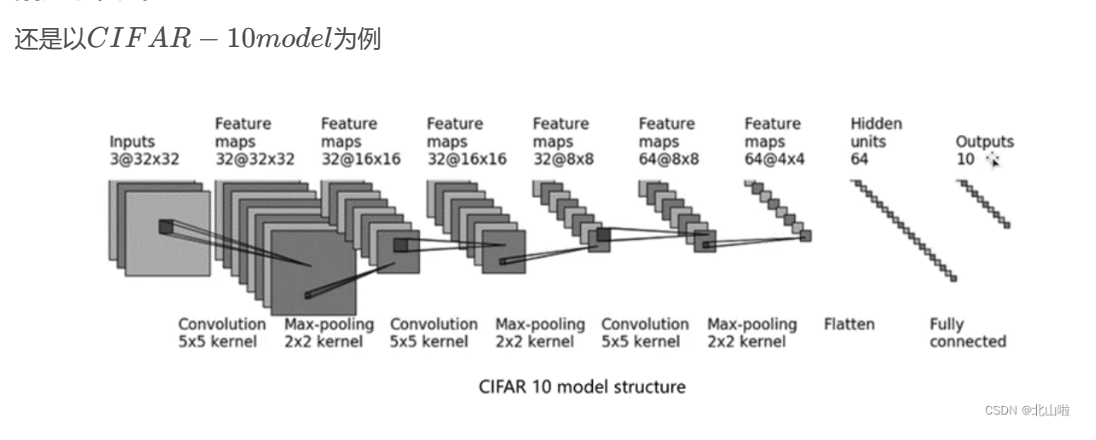

In [6]:
'''创建模型'''
class BS(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3,
                               out_channels=32,
                               kernel_size=5,
                               stride=1,
                               padding=2),  #stride和padding计算得到
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32,
                                   out_channels=32,
                                   kernel_size=5,
                                   stride=1,
                                   padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32,
                                   out_channels=64,
                                   kernel_size=5,
                                   padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),  #in_features变为64*4*4=1024
            nn.Linear(in_features=1024, out_features=64),
            nn.Linear(in_features=64, out_features=10),
        )
    
    def forward(self,x):
        x = self.model(x)
        return x
    
bs = BS()
print(bs)

BS(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1024, out_features=64, bias=True)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)


>一般来说，会将网络单独存放在一个model.py文件当中，然后利用from model import * 进行导入

In [4]:
'''定义损失函数和优化器'''
# 使用交叉熵损失函数
loss_fn = nn.CrossEntropyLoss()  
# 定义优化器
learning_rate = 1e-2  #学习率0.01
optimizer = torch.optim.SGD(bs.parameters(), lr=learning_rate)

In [5]:
"""
训练循环步骤
"""
# 开始设置训练神经网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0
# 训练的轮数
epoch = 10

writer = SummaryWriter(".logs")  #Tensorboard可视化
for i in range(epoch):
    print("----第{}轮训练开始----".format(i))
    '''训练步骤开始'''
    bs.train()  #有batchnorm、dropo层需要调用。官方文档见torch.nn.Module
    for data in train_dataloader:
        imgs, targets = data
        outputs = bs(imgs)
        loss = loss_fn(outputs, targets)

        optimizer.zero_grad()  # 首先要梯度清零
        loss.backward()  #得到梯度
        optimizer.step()  #进行优化

        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}， loss:{}".format(total_train_step, loss.item()))

            writer.add_scalar("train_loss", loss.item(), total_train_step)
    '''测试步骤开始'''
    bs.eval()
    total_test_loss = 0
    #total_accuracy
    total_accuracy = 0
    with torch.no_grad(
    ):  #torch.no_grad()是一个上下文管理器，用来禁止梯度的计算，通常用来网络推断中，它可以减少计算内存的使用量。
        for imgs, targets in test_dataloader:
            outputs = bs(imgs)
            loss = loss_fn(outputs, targets)
            total_test_loss = total_test_loss + loss.item()  #.item()取出数字
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy += accuracy
    """测试过程的记录和输出"""
    print("整体测试集上损失函数loss：{}".format(total_test_loss))
    print("整体测试集上正确率：{}".format(total_accuracy / test_data_size))
    writer.add_scalar("test_loss", total_test_loss, total_test_step)
    writer.add_scalar('test_accuracy', total_accuracy / test_data_size)
    total_test_step = total_test_step + 1
    torch.save(bs, "test_{}.pth".format(i))
    print("模型已保存")
"""
结束训练步骤
"""
writer.close()

----第0轮训练开始----
训练次数：100， loss:2.2780938148498535
整体测试集上损失函数loss：359.37138533592224
整体测试集上正确率：0.11800000071525574
模型已保存
----第1轮训练开始----
训练次数：200， loss:2.2522900104522705
训练次数：300， loss:2.2669167518615723
整体测试集上损失函数loss：352.35992312431335
整体测试集上正确率：0.15410000085830688
模型已保存
----第2轮训练开始----
训练次数：400， loss:2.1929564476013184
整体测试集上损失函数loss：342.2533423900604
整体测试集上正确率：0.1738000065088272
模型已保存
----第3轮训练开始----
训练次数：500， loss:2.071988582611084
训练次数：600， loss:1.9815709590911865
整体测试集上损失函数loss：348.54651749134064
整体测试集上正确率：0.19550000131130219
模型已保存
----第4轮训练开始----
训练次数：700， loss:2.040489912033081
整体测试集上损失函数loss：336.52705574035645
整体测试集上正确率：0.2345999926328659
模型已保存
----第5轮训练开始----
训练次数：800， loss:1.9569575786590576
训练次数：900， loss:1.8887059688568115
整体测试集上损失函数loss：320.69439375400543
整体测试集上正确率：0.28200000524520874
模型已保存
----第6轮训练开始----
训练次数：1000， loss:1.8063756227493286
整体测试集上损失函数loss：303.65771329402924
整体测试集上正确率：0.3246999979019165
模型已保存
----第7轮训练开始----
训练次数：1100， loss:1.8649661540985107
训练次数：1200， l

利用tensoraboard显示：

tensorboar --logdir logs

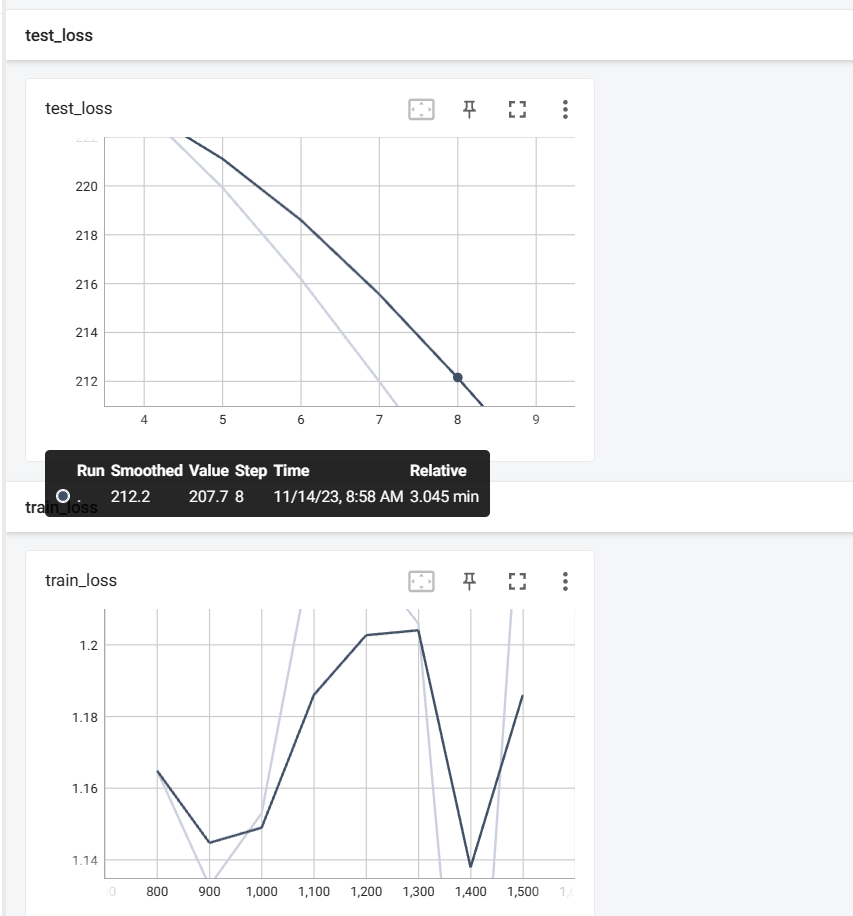

>补充.item()

In [6]:
import torch
a = torch.tensor(5)
print(a)
print(a.item())

tensor(5)
5


# 采用GPU训练

以上一篇`完整的模型训练套路`中的代码为例，采用GPU训练

1. 判断电脑GPU可不可用

如果可用的话device就采用cuda()即调用GPU，不可用的话就采用cpu()即调用CPU。

`device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')`

In [8]:
import torch  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
device

device(type='cuda')

2. 将模型移动到GPU上

通过调用to(device)方法将模型的参数和缓冲区移动到指定的设备上。

In [13]:
# 将模型移动到GPU上
bs = bs.to(device)

3.将数据也移动到GPU上

在迭代训练和测试数据之前，将数据也移动到GPU上。

In [16]:
# 将数据移动到GPU上
imgs = imgs.to(device)
targets = targets.to(device)

NameError: name 'imgs' is not defined

4.损失函数



In [11]:
# 将损失函数转换到device上去
loss_fn = loss_fn.to(device)

> 完整代码

In [18]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [20]:
'''创建模型'''
class BS(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3,
                               out_channels=32,
                               kernel_size=5,
                               stride=1,
                               padding=2),  #stride和padding计算得到
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32,
                                   out_channels=32,
                                   kernel_size=5,
                                   stride=1,
                                   padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32,
                                   out_channels=64,
                                   kernel_size=5,
                                   padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),  #in_features变为64*4*4=1024
            nn.Linear(in_features=1024, out_features=64),
            nn.Linear(in_features=64, out_features=10),
        )
    
    def forward(self,x):
        x = self.model(x)
        return x
    
bs = BS()
print(bs)

BS(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1024, out_features=64, bias=True)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [22]:
'''
检查gpu是否可以用，并定义设备
'''
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1.数据集加载
train_data = torchvision.datasets.CIFAR10(
    root="dataset",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)
test_data = torchvision.datasets.CIFAR10(
    root="dataset",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)
train_data_sise = len(train_data)
print("训练数据集的长度为：{}".format(train_data_sise))
test_data_sise = len(test_data)
print("测试数据集的长度：{}".format(test_data_sise))
train_dataloader = DataLoader(test_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

#2. 模型
# 实例化网络模型
bs = BS()

bs = bs.to(device)  # 将模型移动到GPU上

# 3.损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
loss_fn = loss_fn.to(device)  # 将损失函数转换到device上去
# 进行优化器
learning_rate = 1e-2
optimizer = torch.optim.SGD(bs.parameters(), lr=learning_rate)
"""
4.训练循环步骤
4.1 为训练做的参数准备工作
"""
# 开始设置训练神经网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0
# 记录是第几轮训练
epoch = 10
# 添加Tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("----第{}轮训练开始----".format(i))
    """
    4.2 训练循环
    """
    # 训练步骤
    for data in train_dataloader:
        '''
        将训练数据（imgs和targets）也移动到GPU上
        '''
        imgs, targets = data
        imgs = imgs.to(device)
        targets = targets.to(device)
        outputs = bs(imgs)
        loos_result = loss_fn(outputs, targets)
        # 优化器优化模型
        # 将上一轮的梯度清零
        optimizer.zero_grad()
        # 借助梯度进行反向传播
        loos_result.backward()
        optimizer.step()

        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}， loss:{}".format(total_train_step,
                                            loos_result.item()))
            writer.add_scalar("train_loos", loos_result.item(),
                              total_train_step)
    """
    5.测试循环
    """
    # 测试步骤开始
    total_test_loos = 0
    with torch.no_grad():
        for imgs, targets in test_dataloader:
            '''
            将测试数据（imgs和targets）也移动到GPU上
            '''
            imgs = imgs.to(device)
            targets = targets.to(device)
            outputs = bs(imgs)
            loos_result = loss_fn(outputs, targets)
            total_test_loos = total_test_loos + loos_result.item()
    """
    6.测试过程的记录和输出
    """
    print("整体测试集上损失函数loos：{}".format(total_test_loos))
    writer.add_scalar("test_loos", total_test_loos, total_test_step)
    total_test_step = total_test_step + 1
    torch.save(bs, "test_{}.pth".format(i))
    print("模型已保存")
"""
7.结束训练步骤
"""
writer.close()

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度为：50000
测试数据集的长度：10000
----第0轮训练开始----
训练次数：100， loss:2.2869443893432617
整体测试集上损失函数loos：359.930401802063
模型已保存
----第1轮训练开始----
训练次数：200， loss:2.2751801013946533
训练次数：300， loss:2.2699806690216064
整体测试集上损失函数loos：354.798885345459
模型已保存
----第2轮训练开始----
训练次数：400， loss:2.188237428665161
整体测试集上损失函数loos：347.5353766679764
模型已保存
----第3轮训练开始----
训练次数：500， loss:2.1065258979797363
训练次数：600， loss:1.9916164875030518
整体测试集上损失函数loos：348.73677361011505
模型已保存
----第4轮训练开始----
训练次数：700， loss:2.079976797103882
整体测试集上损失函数loos：340.13413071632385
模型已保存
----第5轮训练开始----
训练次数：800， loss:1.9988391399383545
训练次数：900， loss:1.87699556350708
整体测试集上损失函数loos：328.3493628501892
模型已保存
----第6轮训练开始----
训练次数：1000， loss:1.8366260528564453
整体测试集上损失函数loos：312.7676388025284
模型已保存
----第7轮训练开始----
训练次数：1100， loss:1.9063102006912231
训练次数：1200， loss:2.015516519546509
整体测试集上损失函数loos：300.8997710943222
模型已保存
----第8轮训练开始----
训练次数：1300， loss:1.7767063379287

In [24]:
import torch
if torch.cuda.is_available():
    print("GPU is available")   #查看GPU设备是否可用
else:
    print("GPU is not available") 
print(torch.cuda.get_device_name(0)) #查看GPU设备信息
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.tensor([1, 2, 3])
x = x.to(device)   #在GPU上运行Tensor
x

GPU is available
NVIDIA GeForce RTX 3060 Laptop GPU


tensor([1, 2, 3], device='cuda:0')